In [3]:
%matplotlib ipympl
def figure(name, nrows=1, ncols=1, *args, **kwargs):
    plt.close(name)
    return plt.subplots(nrows, ncols, num=name, *args, **kwargs)

import numpy as np
import pylab as plt
plt.style.use('default')

In [4]:
from ipywidgets import FloatSlider, HBox
na = np.newaxis
from mpl_toolkits.axes_grid1 import make_axes_locatable

def colorbar_for_ax(bla, ax=None):
    if ax is None:
        ax = bla.axes
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(bla, cax=cax)
    return cbar

# Aufgabe 3

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
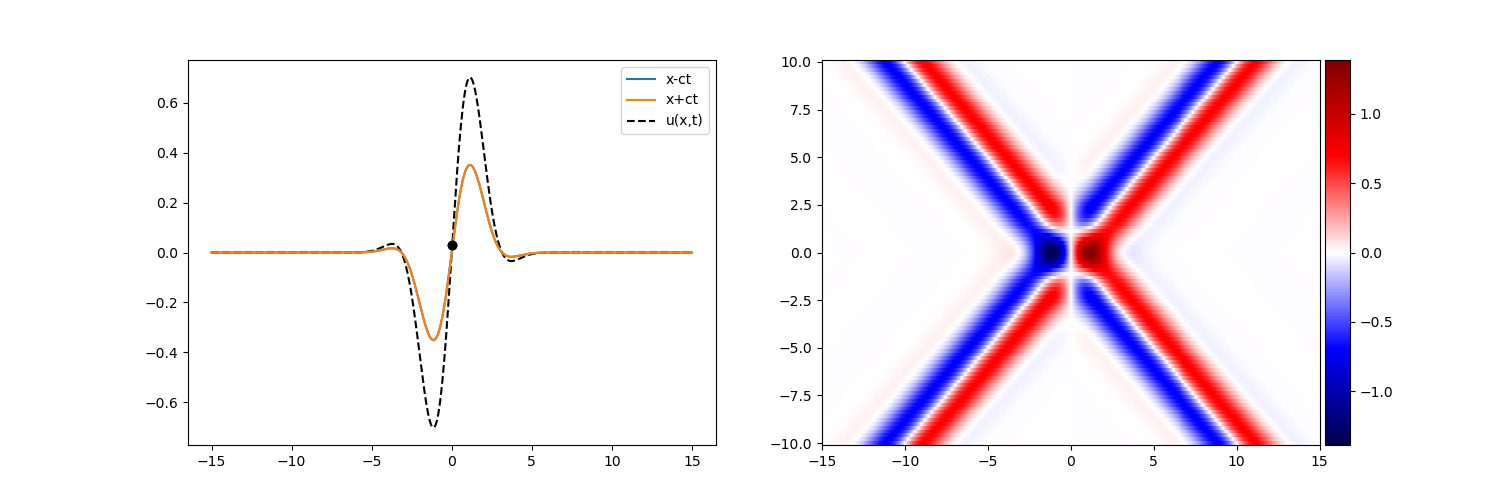

In [5]:
def get_slider():
    ts = FloatSlider(orientation='horizontal', description='t: ', value=0, min=-10, max=10, step=0.1)
    cs = FloatSlider(orientation='horizontal', description='c: ', value=1, min=-2, max=2, step=0.05)

    x = np.linspace(-15, 15, 500)
    
    # Ns = 10
    # fres = np.random.random(Ns) * 2
    # phas = np.random.random(Ns) * 2*np.pi
    # amps = np.random.random(Ns) * 9 + 1
    fres = np.array([1])
    amps = np.array([1])
    phas = np.array([0])
    y = np.sum(amps[na, :] * np.sin(fres[na, :] * x[:, na] + phas[na, :]), axis=1)
    y *= np.exp(-x**2/5)

    fig, ax = figure('wave', 1, 2, figsize=(15, 5))
    lines = [ax[0].plot(x, 0.5*y, label='x-ct')[0],
             ax[0].plot(x, 0.5*y, label='x+ct')[0],
             ax[0].plot(x, y, 'k--', label='u(x,t)', zorder=1)[0],
             ax[0].plot([0], [y[500//2]], 'ko')[0],
             ax[0].plot([0], [y[500//2]], 'ko')[0]]

    ax[0].legend()
    
    
    X, T = np.meshgrid(x, np.linspace(-10, 10, 100))
    c = cs.value
    U1 = np.sum(amps[na, na, :] * np.sin(fres[na, na, :] * (X[:, :, na] - c*T[:,:, na]) + phas[na, na, :]), axis=2)
    U1 *= np.exp(-(X[:, :] - c*T[:,:])**2/5)
    
    U2 = np.sum(amps[na, na, :] * np.sin(fres[na, na, :] * (X[:, :, na] + c*T[:,:, na]) + phas[na, na, :]), axis=2)
    U2 *= np.exp(-(X[:, :] + c*T[:,:])**2/5)
    
    colorbar_for_ax(ax[1].pcolormesh(X, T, U1 + U2, shading='auto', cmap='seismic'))
    
    def redraw(change):
        t = ts.value
        c = cs.value
        y1 = np.sum(amps[na, :] * np.sin(fres[na, :] * (x[:, na] - c*t) + phas[na, :]), axis=1)
        y1 *= np.exp(-(x-c*t)**2/5)
        
        y2 = np.sum(amps[na, :] * np.sin(fres[na, :] * (x[:, na] + c*t) + phas[na, :]), axis=1)
        y2 *= np.exp(-(x+c*t)**2/5)

        lines[0].set_data(x, 0.5*y1)
        lines[1].set_data(x, 0.5*y2)
        lines[2].set_data(x, 0.5*y1 + 0.5*y2)
        lines[3].set_data([+c*t], [y1[np.searchsorted(x, +c*t)]])
        lines[4].set_data([-c*t], [y2[np.searchsorted(x, -c*t)]])
        
        U1 = np.sum(amps[na, na, :] * np.sin(fres[na, na, :] * (X[:, :, na] - c*T[:,:, na]) + phas[na, na, :]), axis=2)
        U1 *= np.exp(-(X[:, :] - c*T[:,:])**2/5)

        U2 = np.sum(amps[na, na, :] * np.sin(fres[na, na, :] * (X[:, :, na] + c*T[:,:, na]) + phas[na, na, :]), axis=2)
        U2 *= np.exp(-(X[:, :] + c*T[:,:])**2/5)
            
        ax[1].set_xlabel('x')
        ax[1].set_xlabel('t')
        
        ax[1].clear()
        colorbar_for_ax(ax[1].pcolormesh(X, T, U1 + U2, shading='auto', cmap='seismic'))
        c_old = c
        ax[1].set_xlabel('x')
        ax[1].set_xlabel('t')

        fig.canvas.draw()
        fig.canvas.flush_events()


    ts.observe(redraw, names='value')
    cs.observe(redraw, names='value')
    return HBox([ts, cs])

get_slider()